# Imports

In [1]:
import os
import sys
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# If you intend to run the notebook from its original folder, example/start, you can keep the following line.
# Otherwise, you need to append the path to the leaspy folder
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

from leaspy.main import Leaspy
from leaspy.inputs.data.data import Data
from leaspy.inputs.settings.algorithm_settings import AlgorithmSettings
from leaspy.utils.output.visualization.plotter import Plotter

# Step 1. Inputs

### - Data

To load the data, you have two options : either loading a csv file, or, loading a dataframe. The second option might be of interest if you have csv file from which you want to subselect a part of the data or of the features, and, passing it to Leaspy. The corresponding command is
`data = Data.from_dataframe(df)`

The input format is identical for both : one line per measurement, resulting in multiple lines per subject, with one column named 'ID' for the subject index, and one column name 'TIME' for the time at which the measurement is done (it is usually the age of the subject at the given measurement)

In [4]:
data = Data.from_csv_file(os.path.join('_inputs', 'data.csv'))

### - Parameters

To run any algorithm, you need to specify its settings. To ease Leaspy's usage for beginners, we specified default values for each algorithm. Therefore, the name of the algorithm used is enough to run it. However, you can load the algorithm settings you want by using `settings.load_json(path/to_json)`. Some example of such json are given in the `_inputs` folder. 
Nevertheless, you can choose to change only some parameters with optional arguments, such as the `n_iter` example bellow. The list of these optional arguments is actually the one in the previous json files.

Finally, the function `set_logs` allows you to save graphical logs of the run. The folder you set must exist prior to running the algorithm. However, if it already contains elements (if you have already run the algorith for instance), it will kindly ask you if you want to erase the previous logs. 

Be careful that you have the `_outputs/logs/fit` folder. Otherwise, you can create them with `os.mkdir('_outputs')`, `os.mkdir(os.path.join('_outputs', 'logs'))` and `os.mkdir(os.path.join('_outputs', 'logs', 'fit'))`

In [5]:
if not os.path.isdir('_outputs/logs/fit'):
    os.makedirs('_outputs/logs/fit')

algo_settings = AlgorithmSettings('mcmc_saem', n_iter=4000)
algo_settings.set_logs('_outputs/logs/fit') 


# Step 2. Fit model

Now that you have your data and your settings, you can run the model. You first need to choose the type of progression shape you want to give to your data. You can either choose logistic or linear (soon exponential) with the possibility to enforce a parallelism between the features. The dedicated names are  :

`logistic`, `logistic_parallel`, `linear` and `linear_parallel`.

While the non parallel version might better fit your data as it has additional degrees of freedom, the parallel version gives you a clearer understanding of the ordering of your features.

Note : the model might rely on hyperparameters that you can define as shown below. There are optional.

In [6]:
leaspy = Leaspy("logistic_parallel")
leaspy.model.load_hyperparameters({'source_dimension': 2}) # Optional

In [7]:
leaspy.fit(data, algorithm_settings=algo_settings)

/Users/igor.koval/Documents/Work/leaspy/example/start/../../leaspy/algo/samplers/abstract_sampler.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  accepted = torch.tensor(1. * (torch.rand(alpha.size(0)) < alpha), dtype=torch.float32)


=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 0
=Samplers 
    g rate : 0.0%, std: 0.004999999888241291
    deltas rate : 2.666666731238365%, std: 0.004999999888241291
    tau rate : 3.451612964272499%, std: 0.1000000461935997
    xi rate : 2.548387087881565%, std: 0.1000000461935997
    sources rate : 3.8064517080783844%, std: 0.1000000461935997
    betas rate : 1.3333333656191826%, std: 0.004999999422580004

=== MODEL ===
g : 1.0
tau_mean : 70.12882232666016
tau_std : 2.0707433223724365
xi_mean : -3.0119216442108154
xi_std : 0.11293594539165497
sources_mean : 0.0
sources_std : 1.0
noise_std : 0.26734116673469543
deltas : tensor([ 0.0000, -0.0030, -0.0069])
betas : tensor([[ 0.0023,  0.0000],
        [ 0.0000,  0.0000],
        [-0.0021,  0.0000]])

Duration since last print : 0.0s


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 50
=Samplers 
    g rate : 56.00000023841858%, std: 0.006049999967217445
    deltas rate : 73.33333492279053%, std: 0.006049999967217445
    tau rate : 97.59677648544312%, std: 0.12100003659725189
    xi rate : 83.48386883735657%, std: 0.1209556832909584
    sources rate : 88.96774053573608%, std: 0.12100003659725189
    betas rate : 68.00000071525574%, std: 0.006049999967217445

=== MODEL ===
g : 1.0782911777496338
tau_mean : 70.24435424804688
tau_std : 2.0597939491271973
xi_mean : -3.359649896621704
xi_std : 0.293852299451828
sources_mean : 0.0
sources_std : 1.0
noise_std : 0.22125144302845
deltas : tensor([-0.0939, -0.1103, -0.0542])
betas : tensor([[-0.0313, -0.0407],
        [-0.0435, -0.0505],
        [-0.0824, -0.0472]])

Duration since last print : 3.0s
=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 100
=Samplers 
    g rate : 60.00000238418579%, std: 0.007320500444620848
    deltas rate : 61.3333344459533

=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 550
=Samplers 
    g rate : 36.000001430511475%, std: 0.03363751247525215
    deltas rate : 45.33333480358124%, std: 0.038234639912843704
    tau rate : 77.49999761581421%, std: 0.7950649261474609
    xi rate : 49.01612997055054%, std: 0.6432737112045288
    sources rate : 29.88709807395935%, std: 0.3394264280796051
    betas rate : 26.66666805744171%, std: 0.008950146846473217

=== MODEL ===
g : 0.9758225679397583
tau_mean : 70.50698852539062
tau_std : 4.420987606048584
xi_mean : -2.5259451866149902
xi_std : 1.4203739166259766
sources_mean : 0.0
sources_std : 1.0
noise_std : 0.11665029078722
deltas : tensor([-1.4952, -1.9744, -1.6800])
betas : tensor([[ 0.0749,  0.0591],
        [-0.0544, -0.0569],
        [-0.1328, -0.1314]])

Duration since last print : 3.0s
=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 600
=Samplers 
    g rate : 47.999998927116394%, std: 0.03700126335024834
    deltas rate : 45.3333348035812

=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 1050
=Samplers 
    g rate : 23.999999463558197%, std: 0.03626493737101555
    deltas rate : 30.666667222976685%, std: 0.07378986477851868
    tau rate : 39.59677517414093%, std: 3.033482313156128
    xi rate : 28.145161271095276%, std: 1.0107313394546509
    sources rate : 37.43548393249512%, std: 0.6989385485649109
    betas rate : 35.33333241939545%, std: 0.007134387269616127

=== MODEL ===
g : 0.5409154891967773
tau_mean : 72.57909393310547
tau_std : 7.6089396476745605
xi_mean : -1.7859094142913818
xi_std : 0.8968912363052368
sources_mean : 0.0
sources_std : 1.0
noise_std : 0.09960460662841797
deltas : tensor([-2.6477, -2.4539, -1.1722])
betas : tensor([[ 0.0626,  0.0494],
        [ 0.0506,  0.0408],
        [-0.0474, -0.0286]])

Duration since last print : 3.0s
=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 1100
=Samplers 
    g rate : 15.999999642372131%, std: 0.03626493737101555
    deltas rate : 25.3333330

=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 1550
=Samplers 
    g rate : 23.999999463558197%, std: 0.03989143297076225
    deltas rate : 29.333332180976868%, std: 0.06527798622846603
    tau rate : 31.645160913467407%, std: 4.004227638244629
    xi rate : 27.967742085456848%, std: 0.8891485333442688
    sources rate : 31.177419424057007%, std: 0.7336456775665283
    betas rate : 26.66666805744171%, std: 0.00583008723333478

=== MODEL ===
g : 0.873638927936554
tau_mean : 71.25099182128906
tau_std : 7.396151065826416
xi_mean : -1.773635983467102
xi_std : 1.017618179321289
sources_mean : 0.0
sources_std : 1.0
noise_std : 0.09946548938751221
deltas : tensor([-2.7036, -2.4554, -0.9905])
betas : tensor([[ 0.0685,  0.0510],
        [ 0.0543,  0.0393],
        [-0.0434, -0.0369]])

Duration since last print : 3.0s
=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 1600
=Samplers 
    g rate : 28.00000011920929%, std: 0.04388057813048363
    deltas rate : 23.99999946355

=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 2050
=Samplers 
    g rate : 36.000001430511475%, std: 0.025651928037405014
    deltas rate : 33.33333432674408%, std: 0.0697045549750328
    tau rate : 31.564515829086304%, std: 4.129031658172607
    xi rate : 29.40322458744049%, std: 0.8703329563140869
    sources rate : 30.161291360855103%, std: 0.726825475692749
    betas rate : 21.99999988079071%, std: 0.005825526546686888

=== MODEL ===
g : 0.842160701751709
tau_mean : 71.64691162109375
tau_std : 7.24220085144043
xi_mean : -1.7244364023208618
xi_std : 0.9461737275123596
sources_mean : 0.0
sources_std : 1.0
noise_std : 0.09917867928743362
deltas : tensor([-2.7136, -2.5098, -0.9794])
betas : tensor([[ 0.0613,  0.0657],
        [ 0.0492,  0.0571],
        [-0.0349, -0.0405]])

Duration since last print : 3.0s
=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 2100
=Samplers 
    g rate : 15.999999642372131%, std: 0.023086734116077423
    deltas rate : 40.0000005960

=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 2550
=Samplers 
    g rate : 23.999999463558197%, std: 0.03718142211437225
    deltas rate : 20.000000298023224%, std: 0.06780152767896652
    tau rate : 31.04838728904724%, std: 4.2841081619262695
    xi rate : 30.903226137161255%, std: 0.9621337056159973
    sources rate : 30.145162343978882%, std: 0.7449334859848022
    betas rate : 25.999999046325684%, std: 0.006533784791827202

=== MODEL ===
g : 0.5220184922218323
tau_mean : 73.85834503173828
tau_std : 7.874833106994629
xi_mean : -1.747504711151123
xi_std : 0.9302690029144287
sources_mean : 0.0
sources_std : 1.0
noise_std : 0.09919610619544983
deltas : tensor([-2.6437, -2.4757, -1.0653])
betas : tensor([[ 0.0765,  0.0602],
        [ 0.0641,  0.0517],
        [-0.0561, -0.0473]])

Duration since last print : 3.0s
=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 2600
=Samplers 
    g rate : 40.00000059604645%, std: 0.04498952254652977
    deltas rate : 31.9999992

=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 3050
=Samplers 
    g rate : 20.000000298023224%, std: 0.03571632504463196
    deltas rate : 25.333333015441895%, std: 0.07799477130174637
    tau rate : 30.11290431022644%, std: 4.140920162200928
    xi rate : 27.79032289981842%, std: 0.9590603113174438
    sources rate : 27.79032289981842%, std: 0.7775622010231018
    betas rate : 30.666667222976685%, std: 0.006455755326896906

=== MODEL ===
g : 0.6375622153282166
tau_mean : 72.74873352050781
tau_std : 7.736289978027344
xi_mean : -1.6987563371658325
xi_std : 0.8694967031478882
sources_mean : 0.0
sources_std : 1.0
noise_std : 0.09910926222801208
deltas : tensor([-2.7315, -2.5030, -1.0917])
betas : tensor([[ 0.0717,  0.0562],
        [ 0.0558,  0.0441],
        [-0.0492, -0.0325]])

Duration since last print : 3.0s
=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 3100
=Samplers 
    g rate : 20.000000298023224%, std: 0.03571632504463196
    deltas rate : 31.99999928

=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 3550
=Samplers 
    g rate : 15.999999642372131%, std: 0.038895078003406525
    deltas rate : 29.333332180976868%, std: 0.07563042640686035
    tau rate : 29.725807905197144%, std: 4.058785438537598
    xi rate : 29.064515233039856%, std: 0.9366509318351746
    sources rate : 28.887096047401428%, std: 0.7601462006568909
    betas rate : 31.999999284744263%, std: 0.006704002618789673

=== MODEL ===
g : 0.6610488295555115
tau_mean : 72.5782699584961
tau_std : 7.5979108810424805
xi_mean : -1.6926008462905884
xi_std : 0.8972576856613159
sources_mean : 0.0
sources_std : 1.0
noise_std : 0.09943283349275589
deltas : tensor([-2.6434, -2.4787, -1.1081])
betas : tensor([[ 0.0666,  0.0732],
        [ 0.0538,  0.0608],
        [-0.0381, -0.0471]])

Duration since last print : 3.0s
=== ALGO ===
Instance of MCMC_SAEM (tensor) algo 
Iteration 3600
=Samplers 
    g rate : 36.000001430511475%, std: 0.038895078003406525
    deltas rate : 22.666

There are many reasons why one might want to save the output parameters of the model, allowed with the following commands : `leaspy.save(path/to/output/folder/parameters.json)` which creates a json file. You can later on load these parameters directly with `leaspy = Leaspy.load(path/to/output/folder/parameters.json`.

In [8]:
leaspy.save("_outputs/model_parameters.json") # optional

Once fitted, you might want to produce your first result by checking what the estimated long-term trajecory is for your features and data. This is allower with a visualization toolbox as in the example bellow.

Note that the `_output/plots` argument is optional and it basically gives you the opportynity to save the plots where you want, by adding then the `save_as` argument to the plot functions.

 Again, you might need to create the folder with `os.mkdir('_outputs/plots')`

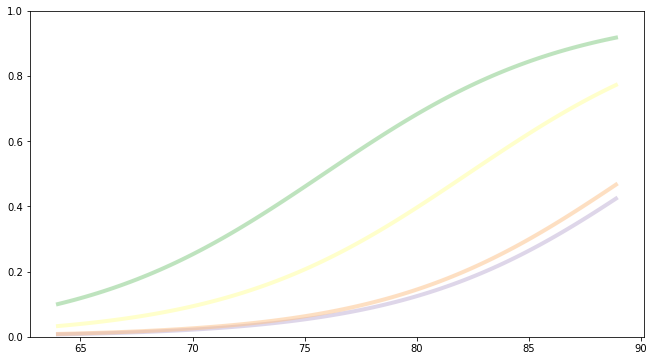

In [9]:
if not os.path.isdir('_outputs/plots'):
    os.makedirs('_outputs/plots')

plotter = Plotter('_outputs/plots') 
plotter.plot_mean_trajectory(leaspy.model, labels=['memory', 'concentration', 'praxis', 'language'], save_as="mean_plot.pdf")


# Step 3. Personalize the model to individual data

### - Personalization

The personalization allows to modify the group-average trajectory to individual observations. This personalization outputs individual parameters that describe how the group-average trajectory has been modifies to git individual data. These parameters are : 
- $\alpha_i = \exp(\xi_i)$ : the acceleration factor, that modulates the speed of progression
- $\tau_i$ : the time shift which delays (earlier or later) the progression in a given number of years
- $w_i$ : the space-shift (which is a function of the sources $(s_{ij})_j$) which might, for a given individual, change the ordering of the conversion of the different features, compared to the mean trajectory.

The personalization is based on some settings for which you can load default values : 

In [10]:
settings = AlgorithmSettings('scipy_minimize')

In [11]:
results = leaspy.personalize(data, settings)

Beginning personalization : std error of the model is 0.09937361627817154
0.09334745
The standard deviation of the noise at the end of the personalization is of 0.0943
Personalization scipy_minimize took : 0.05413790225982666s


The `results` corresponds to the data at head, with the individual parameters. This will be used to draw the next analysis, such as the reconstruction of the individual trajectory, as plotted here : 

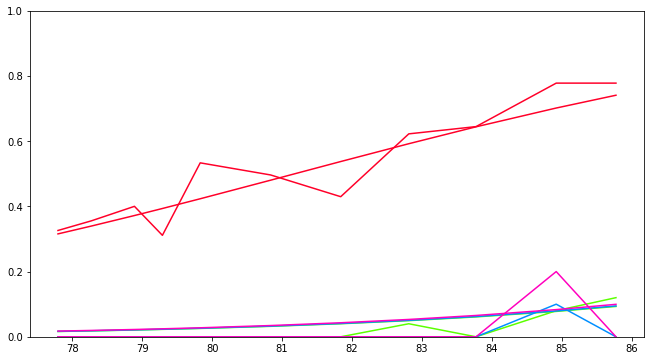

In [12]:
plotter.plot_patient_trajectory(leaspy.model, results, [ '142'], save_as="plot_reconstruction.pdf")

### - Analysis

Further analysis might be undertaken to see how the individual parameters, that modulate the progression of the disease progression, are related to some cofactors. First, one need to load the cofactors : 

In [13]:
df = pd.read_csv(os.path.join(os.getcwd(), '_inputs', 'cofactors.csv'), dtype={'RID': str}).set_index('RID')
data.load_cofactors(df, cofactors=["APOE4", "PTGENDER", "PTMARRY"])

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,98,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The two next commands shows the distribution of $\xi_i$ ($\alpha_i = \exp(\xi_i)$) among the whole population, and then within some subpopulation, here labeled with their genomic APOE4 status.

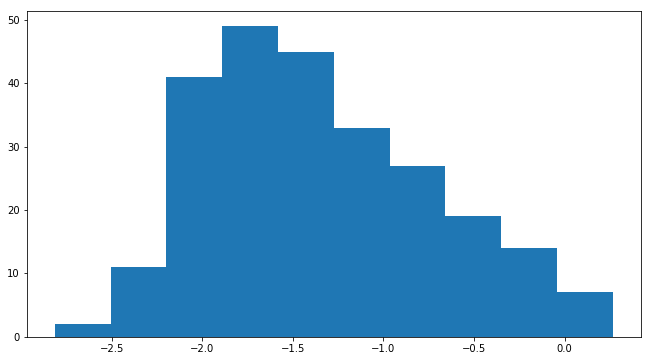

In [14]:
plotter.plot_distribution(results, parameter="xi")

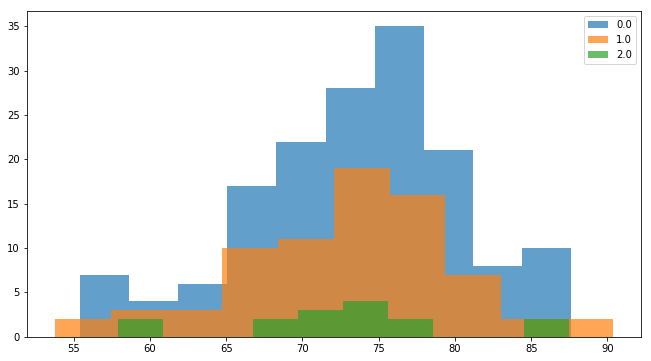

In [15]:
plotter.plot_distribution(results, parameter="tau", cofactor="APOE4")

This analysis helps looking at two different parameters at a time, here $\xi_i$ and $\tau_i$, where each dot is a patient, that one can color with a cofactor.

No handles with labels found to put in legend.


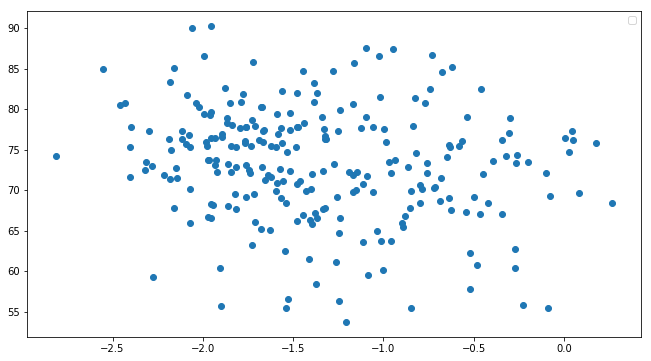

In [16]:
plotter.plot_correlation(results, parameter_1='xi', parameter_2='tau')

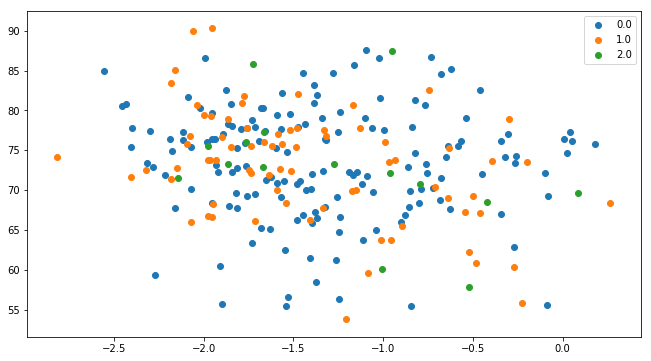

In [17]:
plotter.plot_correlation(results, parameter_1='xi', parameter_2='tau', cofactor='APOE4')

As the algorithm essentially reparametrize each individual timeline towards the group-average, it is possible to see how it has been done. Here, the individual trajectories are projected onto the mean timeline, and it shows that the average is actually a good recombination of short term observations.

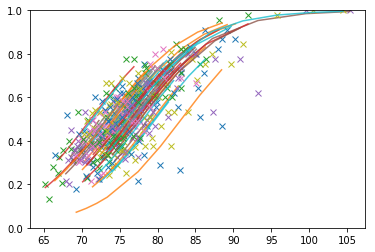

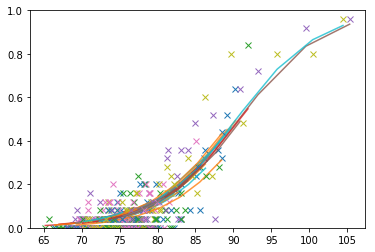

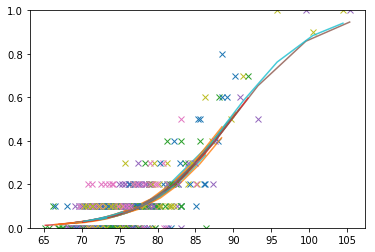

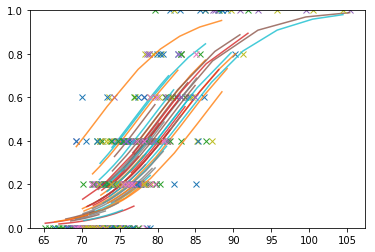

In [18]:
plotter.plot_patients_mapped_on_mean_trajectory(leaspy.model, results)

In [24]:
results.individual_parameters['sources'].mean(0)

tensor([-0.0971, -0.0778])